# Allometric models: relation between diameter at breast height (DBH) and height

Diameter at breast height, or DBH, is a standard method of expressing the diameter of the trunk of a standing tree. DBH is one of the most common dendrometric measurements.
Tree trunks are measured at the height of an adult's breast, which is defined differently in different countries and situations. In many countries, DBH is measured at approximately 1.3 m (4.3 ft) above ground.
DBH is an important parameter to have to calculate the critical wind speed of breakage.
- DBH is usually measured in field works using calipers or tapes.
- Allometric equations try to find a realtion between DBH and other known parameters (here tree height for example).
- Allometric equations are not general and unique, but heavily depends on the considered geographical area.

A common function has the following expression:

$H = (\frac{DBH}{b_1 + b_2 DBH})^3 + c$. The function is invertible in the domain $[0, +\infty]$. 

The inverse function is:
$DBH = \frac{b_1 \sqrt[3]{H-c}} { 1-b_2 \sqrt[3]{H-c}}$, with an asymptote at $H = (\frac{1}{b_2})^3 + c$. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()

plt.close('all')

# Instatiate the function
def _DBH_to_height(DBH, b1, b2, const):
    H = ( DBH / (b1 + b2*DBH) )**3 + const 
    return H

def _height_to_DBH(H, b1, b2, const):
    # Need to be careful about the asymptote as (1/b2)**3 + const
    k = np.cbrt(H - const)
    DBH = np.clip( (b1 * k) / (1 - b2*k), a_min =  0, a_max = None)       
    return DBH

### Model for spruces in Sweden

The model is derived from the article: *Some specific sub-models for simulation of uneven-sized Norway spruce"
[data](https://academic.oup.com/forestry/article/95/5/634/6580516#375802885)
[paper](https://www.diva-portal.org/smash/get/diva2:1605781/FULLTEXT01.pdf)

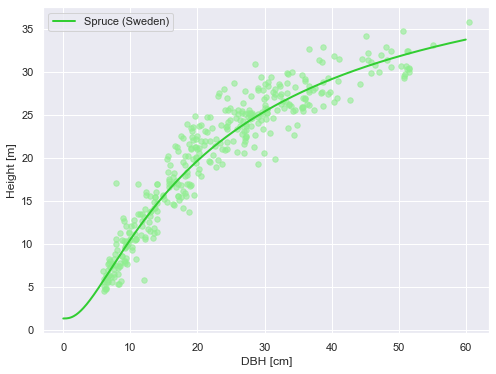

In [2]:
# Data file paths
data_paths = [
    "N1b_all_sep_Mosshult.csv",
    "N1b_all_sep_Lilla Norrskog.csv",
    "N1b_all_sep_Öveshult.csv",
    "N1b_all_sep_Romperöd.csv",
    "N1b_all_sep_Simontorp.csv",
]
df = pd.concat([pd.read_csv("_data/trees/data_csv/" + path, delimiter=';') for path in data_paths])
# Filter rows where X is not equal to 0
df = df[df['Th'] != 0]

plt.figure(figsize=(8, 6))
plt.scatter(df['Dbh']/10, 0.1*df['Th'], marker='o', c = 'lightgreen', s = 30, alpha=0.6) # edgecolor = 'black'

# Allometric model
DBH = np.linspace(0, 60, 500)
height_spruce_sweden = 0.1*_DBH_to_height(DBH, b1 = 0.9133, b2 = 0.1303, const = 13)  #--> multiplication by 0.1 because the original model outputs the height in [dm]
plt.plot(DBH, height_spruce_sweden, label='Spruce (Sweden)', color='limegreen', linewidth=2)

plt.xlabel('DBH [cm]')
plt.ylabel('Height [m]')
plt.legend()


### Models for spruces, pines and birches in Norway

The models are derived from the article: *Modeling height-diameter relationships for Norway spruce, Scots pine, and downy birch using Norwegian national forest inventory data"
[paper(]https://www.tandfonline.com/doi/full/10.1080/21580103.2014.957354). **[no data found. Maybe we can ask NIBIO]**.

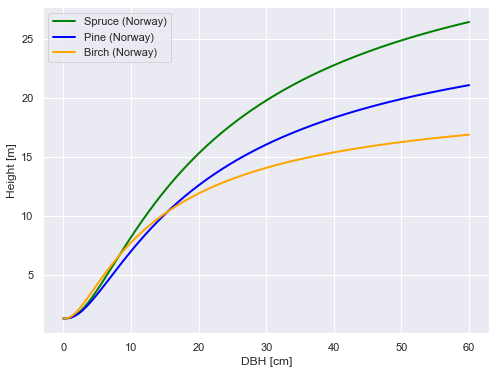

In [3]:
plt.figure(figsize=(8, 6))
DBH = np.linspace(0, 60, 500)

# Spruces
height_spruce_norway = _DBH_to_height(DBH, b1 = 2.2131 , b2 = 0.3046, const = 1.3)
plt.plot(DBH, height_spruce_norway, label='Spruce (Norway)', color='green', linewidth=2)

# Pines
height_pine_norway = _DBH_to_height(DBH, b1 = 2.2845, b2 = 0.3318, const = 1.3)
plt.plot(DBH, height_pine_norway, label='Pine (Norway)', color='blue', linewidth=2)

#Downy birch
birch_y1 = _DBH_to_height(DBH, b1 = 1.649, b2 = 0.373	, const = 1.3)
plt.plot(DBH, birch_y1, label='Birch (Norway)', color='orange', linewidth=2)

plt.xlabel('DBH [cm]')
plt.ylabel('Height [m]')
plt.legend()

Now we invert the function, to plot the height as input and the DBH as output.

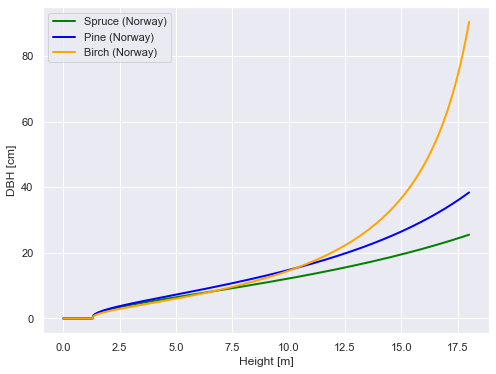

In [4]:
plt.figure(figsize=(8, 6))
# Generate x values
height_space = np.linspace(0, 18, 500)

## Spruce
DBH_spruce = _height_to_DBH(height_space, b1 = 2.2131, b2 = 0.3046, const = 1.3)
plt.plot(height_space, DBH_spruce, label='Spruce (Norway)', color='green', linewidth=2)

## Pines
DBH_pine_1 = _height_to_DBH(height_space, b1 = 2.2845, b2 = 0.3318, const = 1.3)
plt.plot(height_space, DBH_pine_1, label='Pine (Norway)', color='blue', linewidth=2)

## Birch
DBH_birch_1 = _height_to_DBH(height_space, b1 = 1.649, b2 = 0.373, const = 1.3)
plt.plot(height_space, DBH_birch_1, label='Birch (Norway)', color='orange', linewidth=2)

# Add labels and a legend
plt.xlabel('Height [m]')
plt.ylabel('DBH [cm]')
plt.legend()

In [5]:
def plot_height_DBH(b1, b2, const, color, label):    
    asymp = (1/b2)**3 + const
    # Generate height points from 0 until the 80% of the asymptote
    height_space = np.linspace(0, 0.8 * asymp, 200)
    DBH = _height_to_DBH(height_space, b1, b2, const)
    plt.plot(height_space, DBH, linewidth=2, color = color, label = label)

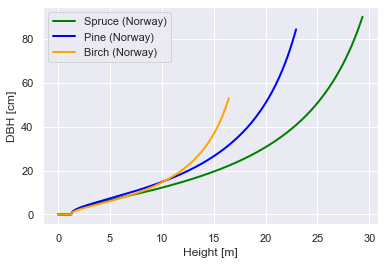

In [6]:
## Spruce
b1 = 2.2131 
b2 = 0.3046
plot_height_DBH(b1, b2, 1.3, color = "green", label = "Spruce (Norway)")

## Pines
b1 = 2.2845
b2 = 0.3318
plot_height_DBH(b1, b2, 1.3, color = "blue", label = "Pine (Norway)")


## Birch
b1 = 1.649
b2 = 0.373	
plot_height_DBH(b1, b2, 1.3, color = "orange", label = "Birch (Norway)")

# Add labels and a legend
plt.xlabel('Height [m]')
plt.ylabel('DBH [cm]')
plt.legend()